<a href="https://colab.research.google.com/github/JAK0707/Iris-Classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Classification

Iris classification is a typical machine learning classification project where we use a dataset to train the module to identify/recognise the target. There are three species of Iris flower. When a new flower is given, we need to predict it belongs to which type. Following figure shows the samples of all three species Iris_Type.jpg we don't have to use image processing. Some numeric measurements are given in the dataset that will help the module to classify.

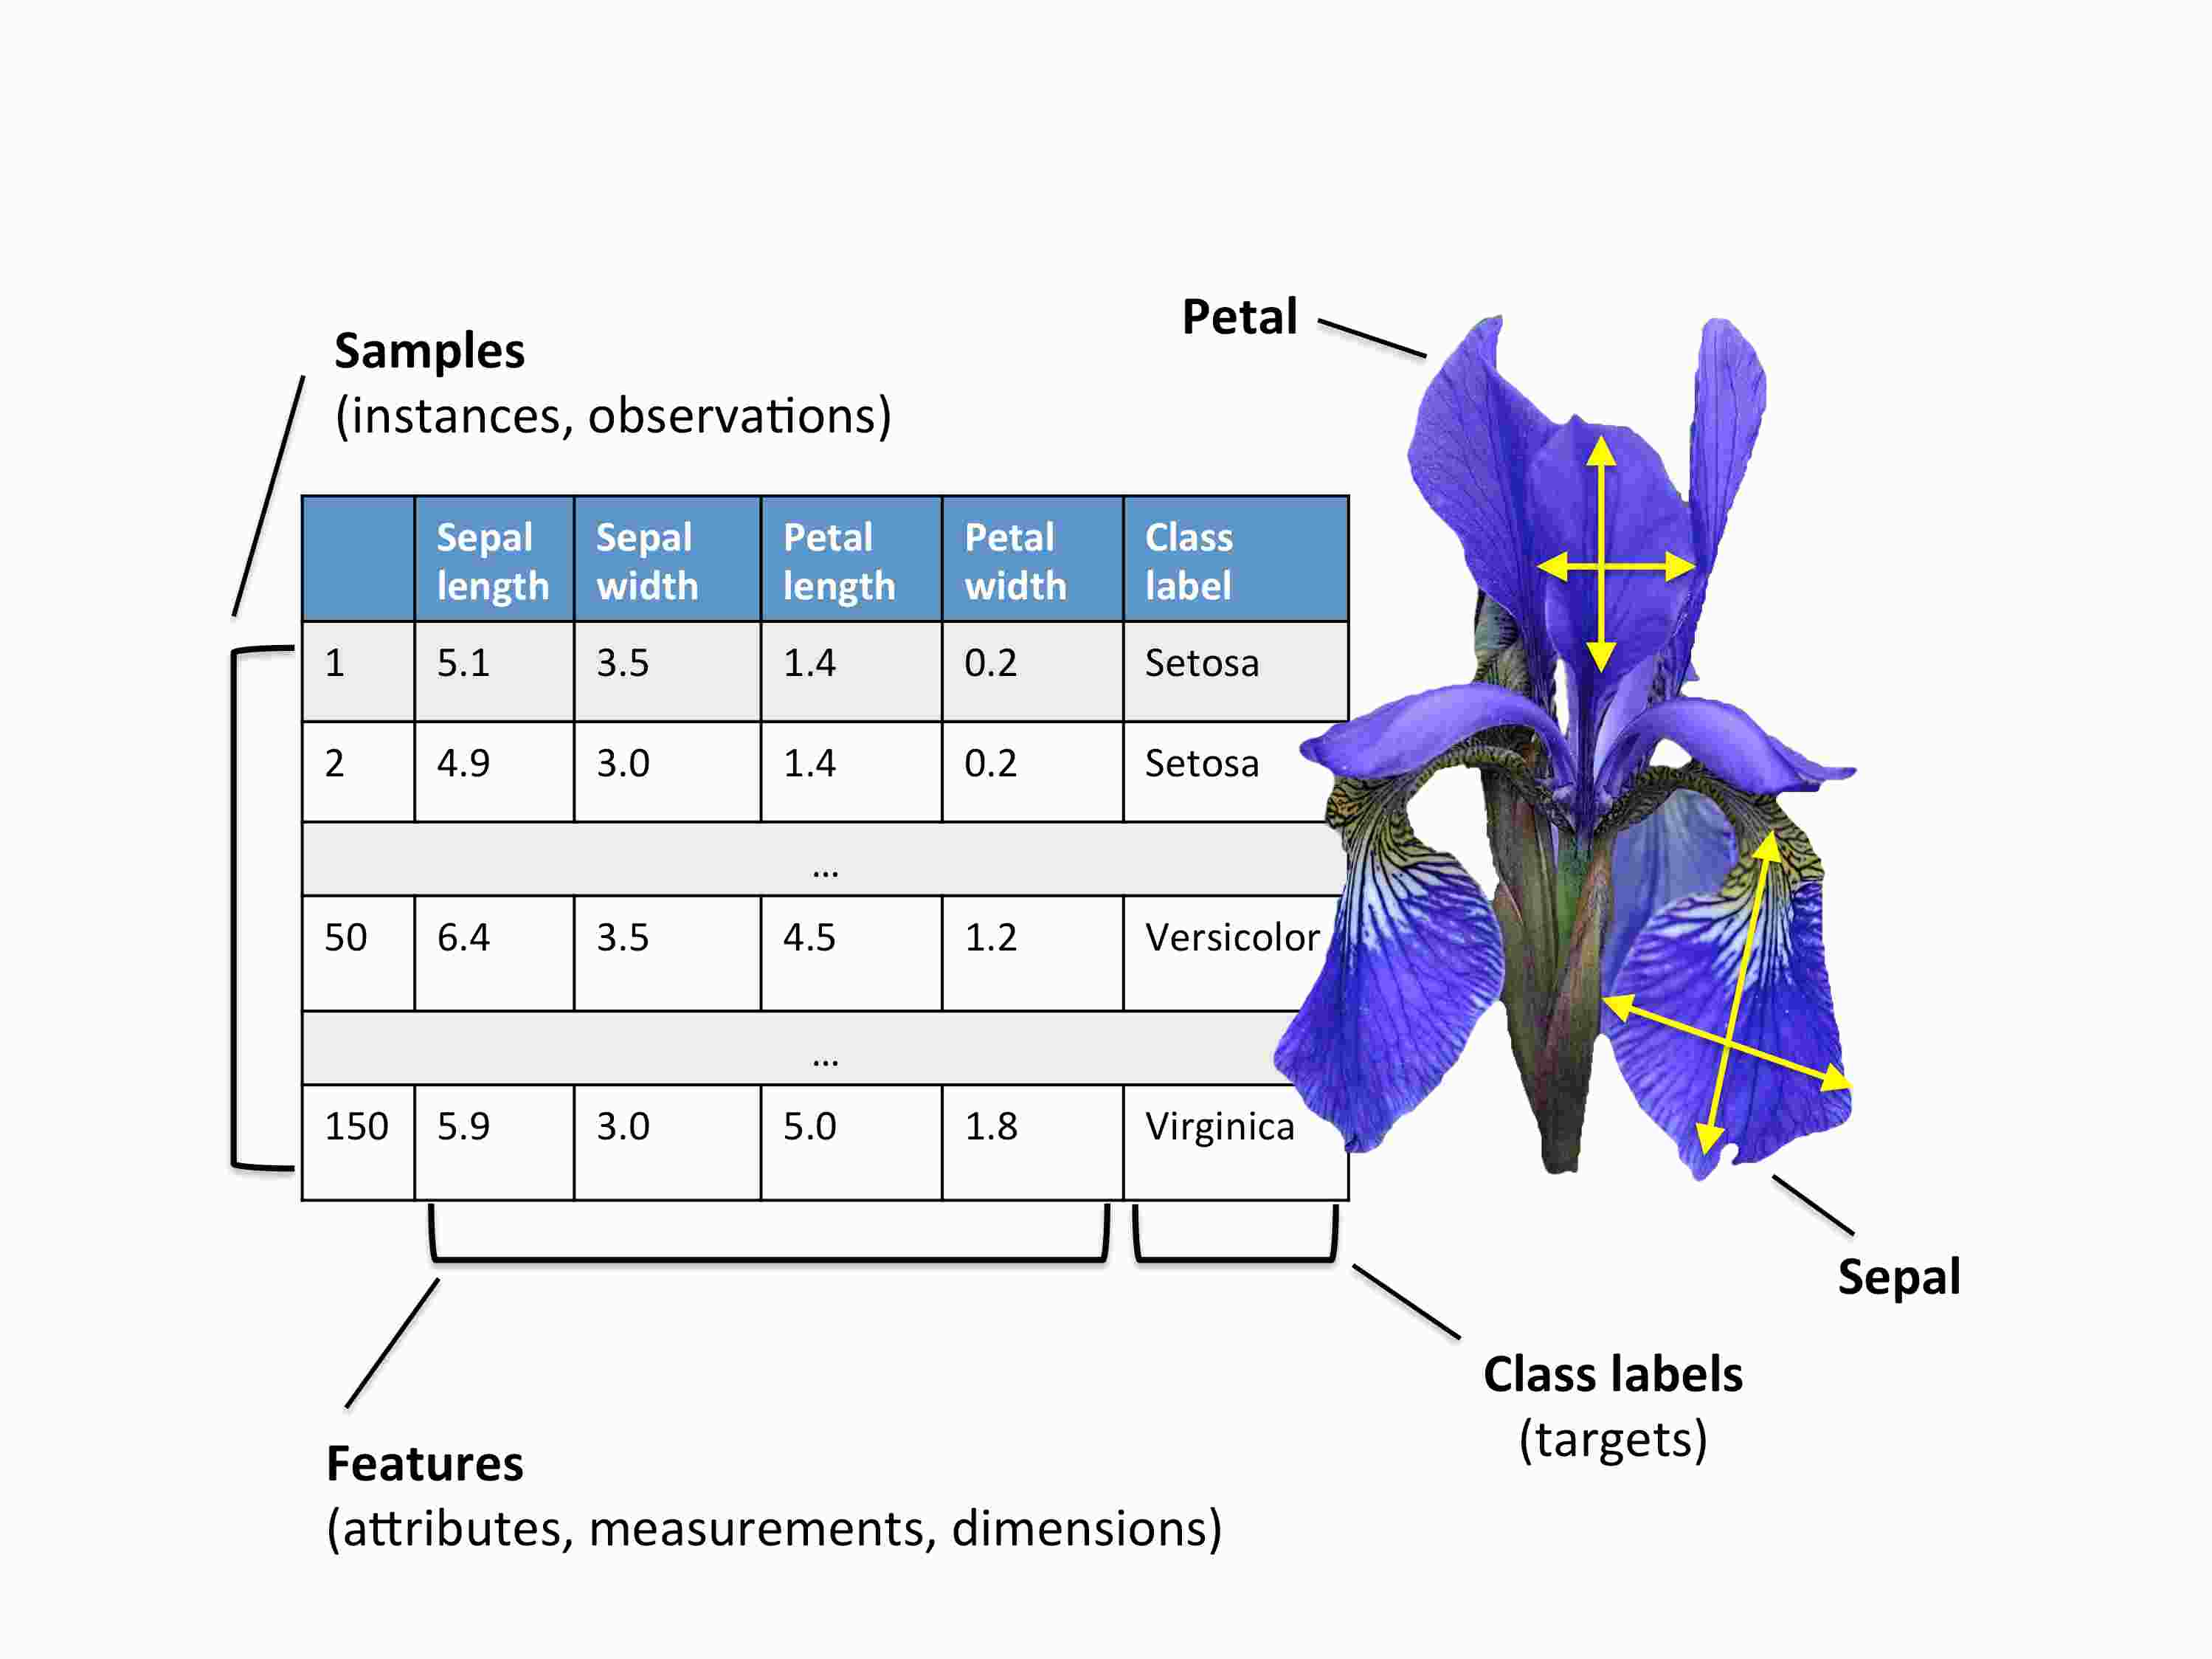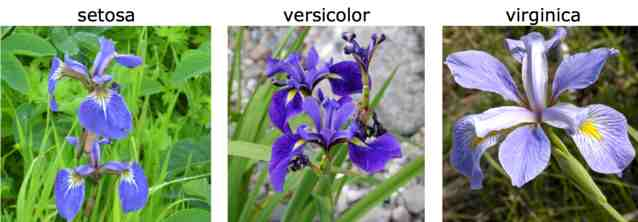

In [ ]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install scikit-learn==1.3.0

In [ ]:
!pip install scikit-learn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 52.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [ ]:
# load the csv data
df = pd.read_csv('IRIS.csv')
df.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
#deleting id column
df = df.drop(columns = ['ID'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#display basic stats of data
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#disolay no. of samples on each class
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

preproccesing data

In [ ]:
#check null values
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

<Axes: >

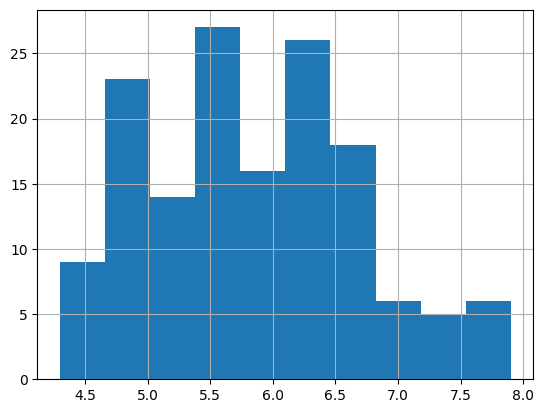

In [ ]:
df['Sepal.Length'].hist()

<Axes: >

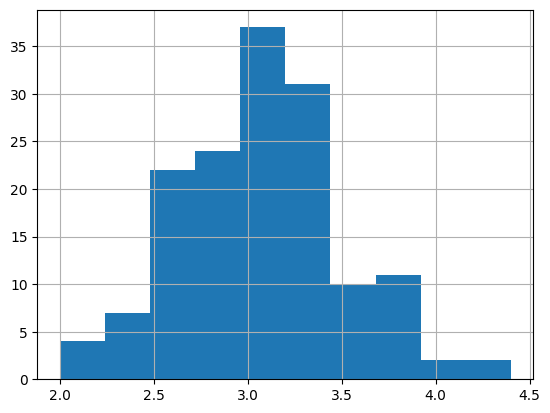

In [ ]:
df['Sepal.Width'].hist()

<Axes: >

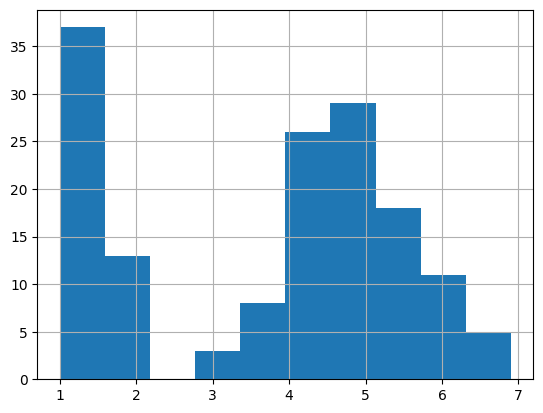

In [ ]:
df['Petal.Length'].hist()

<Axes: >

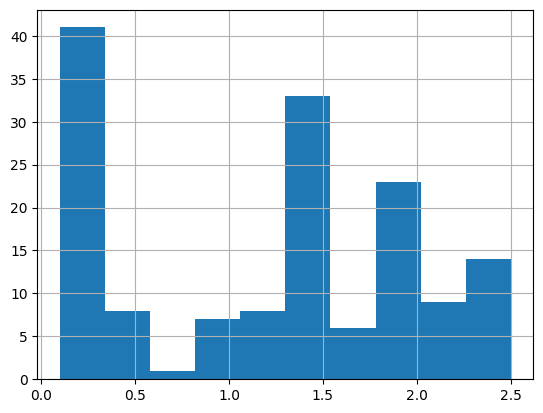

In [ ]:
df['Petal.Width'].hist()

In [ ]:
# create list of colors and class labels
colors = ['red', 'orange', 'blue']
species = ['virginica', 'versicolor', 'setosa']

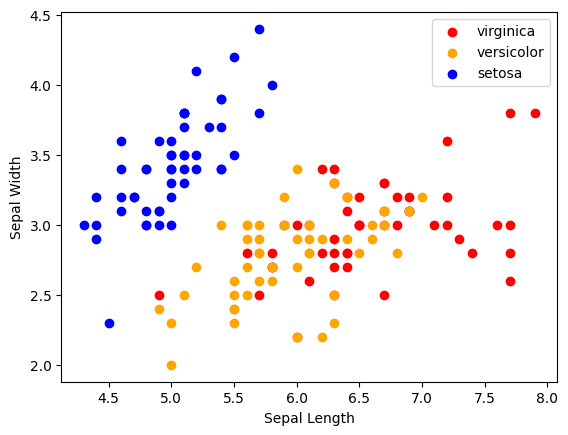

In [ ]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

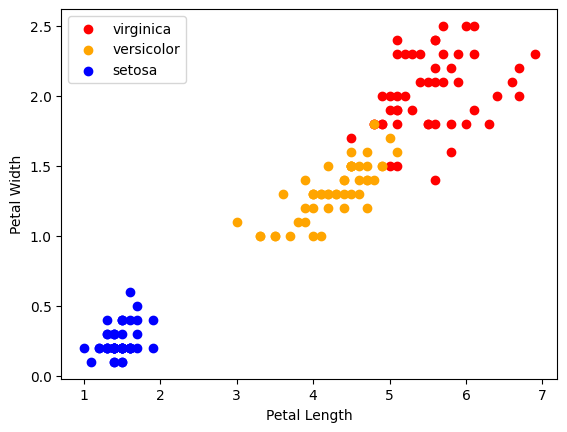

In [ ]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Petal.Length'], x['Petal.Width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

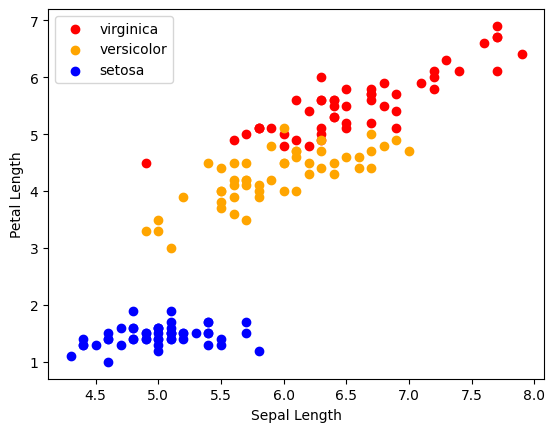

In [ ]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Sepal.Length'], x['Petal.Length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

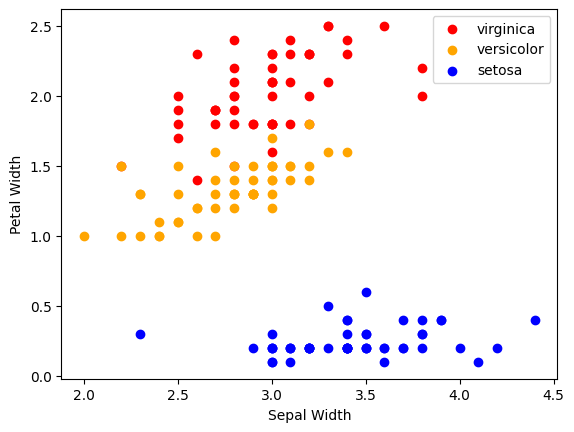

In [ ]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['Sepal.Width'], x['Petal.Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

Correlation Matrix

In [ ]:
import numpy as np

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Display the correlation matrix
correlation_matrix = df_numeric.corr()
correlation_matrix

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

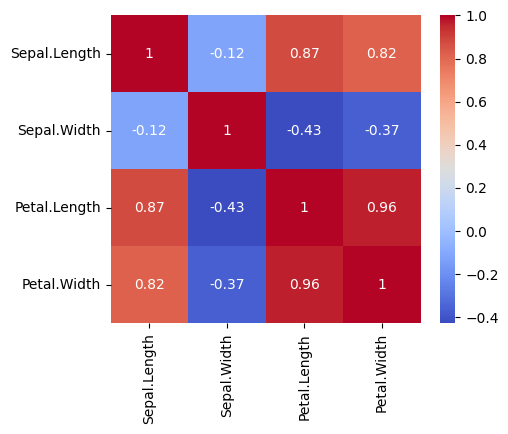

In [ ]:
# plot the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, ax=ax, cmap = 'coolwarm')

Label Encoder

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
# transform the string labels to integer
#df['Species'] = le.fit_transform(df['Species'])
#df.head()

Model Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

# input data
X = df.drop(columns=['Species'])
# output data
Y = df['Species']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test) * 100)

Logistic Regression Accuracy:  97.77777777777777


In [ ]:
# model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [ ]:
# K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ", model.score(x_test, y_test) * 100)

K-nearest neighbors Accuracy:  97.77777777777777


In [ ]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [ ]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  95.55555555555556


In [ ]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [ ]:
import sklearn

In [ ]:
x_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
24,4.8,3.4,1.9,0.2
92,5.8,2.6,4.0,1.2
144,6.7,3.3,5.7,2.5
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6


In [ ]:
import pickle

# Assuming 'model' is your scikit-learn model
with open('saved_model1.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle

# Load the model
with open('saved_model1.pkl', 'rb') as file:
    model = pickle.load(file)